## Lab Notebook - Rift Inversion Project ##
This Jupyter notebooks serves as a record of modeling runs done on Stampede2 as part of the rift inversion project. Each cell includes a note of the current modeling goal and the code to generate the resulting models, as well as a report on the model results.

__NOTE__: Never run all cells, model inputs are designed to be temporary

In [1]:
import ripropagate

# Key function: generate
# Parameters in generate: lthick,evel,etime,output,ver,soft,shell,file

## 7/1/2022 ##
Tested 80 km, 2 cm model (hot/fast), hits breakup at 14.5 Myr, so doing that for real to halfway

In [ ]:
ripropagate.generate(etime=7.3,evel=2,lthick=80,output='./070122_rip',file='ri_base_lowtstep.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)
ripropagate.comp_ascii(depth=600,output='./070122_rip',seed=20,non_initial=True,thicknesses=[20,20,40])

## 7/4/2022 ##
* Finished rifting to halfway, so doing full rift, quiescence, and inversion

In [ ]:
# Full rift
ripropagate.generate(etime=14.5,evel=2,lthick=80,output='./070422_rip_a',file='ri_base_lowtstep.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)

# Quiescence
ripropagate.generate(etime=27.3,evel=0,lthick=80,output='./070422_rip_b',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='b',nodes=3)

# Inversion
ripropagate.generate(etime=27.3,evel=-1,lthick=80,output='./070422_rip_c',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='c',nodes=3)

* Also finished full rift for slow/cold, so starting and inversion and quiescence for that model

In [ ]:
# quiescence
ripropagate.generate(etime=52,evel=0,lthick=120,output='./070422_rip_d',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='d',nodes=3)

# inversion
ripropagate.generate(etime=52,evel=-1,lthick=120,output='./070422_rip_e',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='e',nodes=3)

## 7/6/2022 ##
* Full rift finished for hot/fast (0704a), so starting inversion.
* Quiescence has been running quite slowly, probably due to abrupt transition to 0 velocity, so holding off on that until test run with gradual velocity transition

In [ ]:
ripropagate.generate(etime=34.5,evel=-1,lthick=80,output='./070622_rip_a',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)

## 7/7/2022 ##
* Trying out new quiescence prm.

In [2]:
# quiescence
ripropagate.generate(etime=36,evel=0,lthick=120,output='./070722_rip_a',file='ri_base_qui.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3,
quiescence=True,v1=0.5,v2=-1,start=16)


## 7/8/2022 ##
* Going to try old quiescence on hot fast full breakup model (0704a) since it seems to run ok for these.

In [2]:
ripropagate.generate(etime=34.5,evel=0,lthick=80,output='./070822_rip',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)

## 7/14/2022 ##
* Going to also start rifting models with dislocation creep only. Need to limit duplicate runtime so running these to an early level first.
* Will also do the same with a model with composite creep of dry olivine in mantle lith and wet olivine in asthenosphere (like in Neuarth)

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

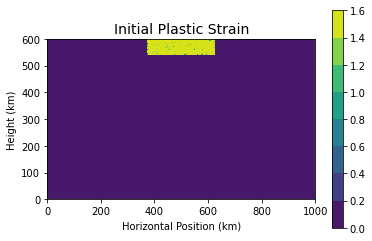

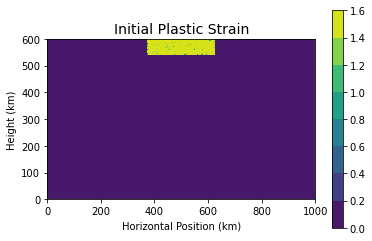

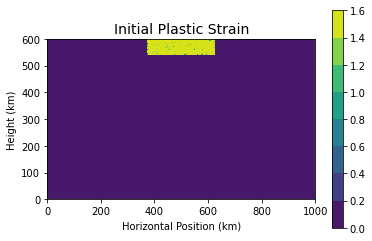

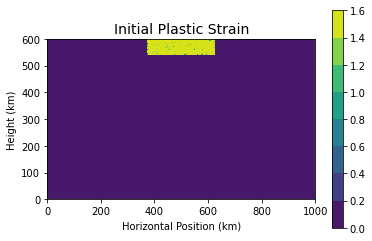

In [3]:
# Full rift
ripropagate.generate(etime=10,evel=2,lthick=80,output='./071422_rip_a',file='ri_base_disl_lowtstep.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)
ripropagate.comp_ascii(depth=600,output='./071422_rip_a',seed=20,non_initial=True,thicknesses=[20,20,40])

# Full rift
ripropagate.generate(etime=25,evel=0.5,lthick=120,output='./071422_rip_b',file='ri_base_disl.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='b',nodes=3)
ripropagate.comp_ascii(depth=600,output='./071422_rip_b',seed=20,non_initial=True,thicknesses=[20,20,80])

# Full rift
ripropagate.generate(etime=10,evel=2,lthick=80,output='./071422_rip_c',file='ri_base_wet_lowtstep.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='c',nodes=3)
ripropagate.comp_ascii(depth=600,output='./071422_rip_c',seed=20,non_initial=True,thicknesses=[20,20,40])

# Full rift
ripropagate.generate(etime=25,evel=0.5,lthick=120,output='./071422_rip_d',file='ri_base_wet.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='d',nodes=3)
ripropagate.comp_ascii(depth=600,output='./071422_rip_d',seed=20,non_initial=True,thicknesses=[20,20,80])

## 7/18/2022 ##
* Hot fast dislocation creep needs to run farther (15 Myr)
* Also need to invert quiescence model for slow-cold-half
* Also need to run slow cold dislocation farther (30 Myr)

In [4]:
# hot fast dislocation continuation
ripropagate.generate(etime=15,evel=2,lthick=80,output='./071822_rip_a',file='ri_base_disl_lowtstep.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='a',nodes=3)

# inversion of slow-cold-half-quiescent
ripropagate.generate(etime=56,evel=-1,lthick=120,output='./071822_rip_b',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='b',nodes=3)

# slow cold dislocation continuation
ripropagate.generate(etime=30,evel=0.5,lthick=120,output='./071822_rip_c',file='ri_base_disl.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='c',nodes=3)

## 7/20/2022 ##
* Holding off on dislocatioin creep models until flow law confusion resolved.
* But ready to invert quiescence model for slow_cold_full (0704d)

In [3]:
# inversion of slow-cold-half-quiescent
ripropagate.generate(etime=72,evel=-1,lthick=120,output='./072022_rip_a',file='ri_base.prm',soft=0.375,depth=600,p1=400,p2=200, shell='run_base.sh',ver='20a',nodes=3)